# Database visualization

In [1]:
import numpy as np
import sqlite3 as lite
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
import os
import sys

from utils.db_utils import get_db_absolute_path, insert_data_to_db
from database.queries import QUERY_FULL_RANK_TEST_GROUPED_A

In [20]:
# Setup sqlite connection
database = get_db_absolute_path()
con = lite.connect(database)

### A table

In [3]:
full_rank_test_grouped_a = pd.read_sql_query(QUERY_FULL_RANK_TEST_GROUPED_A, con)
full_rank_test_grouped_a

,test_dataset,training_dataset,environment,distance,device,training_model,keybyte,epoch,additive_method,additive_param_1,additive_param_1_value,additive_param_2,additive_param_2_value,denoising_method,denoising_param_1,denoising_param_1_value,denoising_param_2,denoising_param_2_value,count_term_p,avg_term_p
0,Wang_2021,Wang_2021 - Cable,office_corridor,15.0,6,cnn_110,0,40,None,None,NaN,None,NaN,None,None,NaN,None,None,100,773.640000
1,Wang_2021,Wang_2021 - Cable,office_corridor,15.0,6,cnn_110,0,50,None,None,NaN,None,NaN,None,None,NaN,None,None,100,732.920000
2,Wang_2021,Wang_2021 - Cable,office_corridor,15.0,6,cnn_110,0,65,None,None,NaN,None,NaN,None,None,NaN,None,None,183,755.169399
3,Wang_2021,Wang_2021 - Cable,office_corridor,15.0,7,cnn_110,0,65,None,None,NaN,None,NaN,None,None,NaN,None,None,210,650.509524
4,Wang_2021,Wang_2021 - Cable,office_corridor,15.0,8,cnn_110,0,65,None,None,NaN,None,NaN,None,None,NaN,None,None,315,604.203175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,Zedigh_2021,Wang_2021 - Cable,office_corridor,2.0,10,cnn_110,0,65,Gaussian,Std,0.0500,Mean,0.0,None,None,NaN,None,None,211,555.222749
112,Zedigh_2021,Wang_2021 - Cable,office_corridor,2.0,9,cnn_110,0,65,Rayleigh,Mode,0.0138,None,NaN,None,None,NaN,None,None,105,445.238095
113,Zedigh_2021,Wang_2021 - Cable,office_corridor,2.0,10,cnn_110,0,65,Rayleigh,Mode,0.0138,None,NaN,None,None,NaN,None,None,105,320.952381
114,Zedigh_2021,Wang_2021 - Cable,office_corridor,2.0,9,cnn_110,0,65,Rayleigh,Mode,0.0276,None,NaN,None,None,NaN,None,None,105,796.733333


# Test dataset: Wang 2021

## Compare Additive noise methods

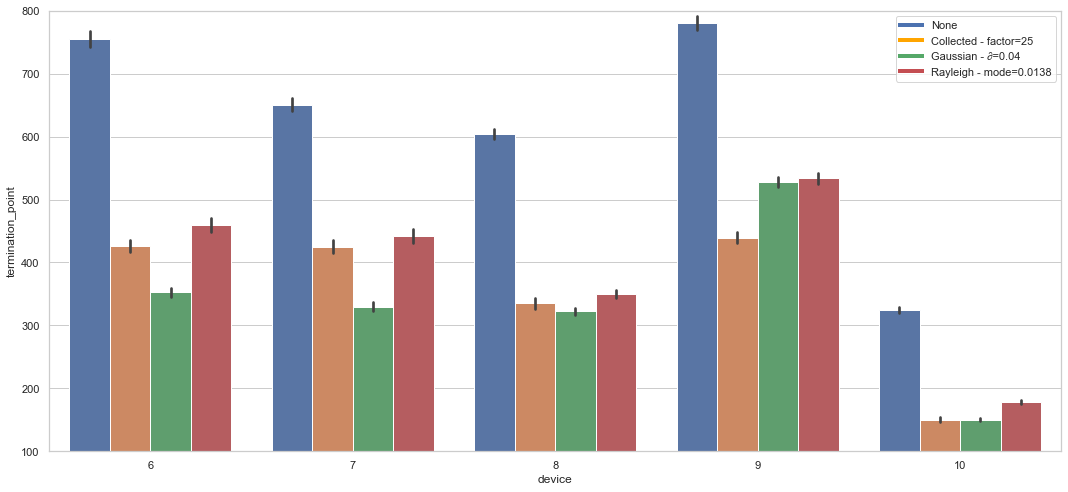

In [4]:
query = """
select
    device, 
    epoch, 
    additive_noise_method,
    additive_noise_method_parameter_1, 
    additive_noise_method_parameter_1_value, 
    additive_noise_method_parameter_2, 
    additive_noise_method_parameter_2_value, 
    termination_point
from
    full_rank_test
where
    test_dataset = 'Wang_2021'
    AND epoch = 65 
    AND distance = 15
    AND denoising_method IS NULL
    AND (
        additive_noise_method_parameter_1_value = 0.04
        OR additive_noise_method_parameter_1_value IS NULL
        OR additive_noise_method_parameter_1_value = 25
        OR additive_noise_method_parameter_1_value = 0.0138
    )
order by
    additive_noise_method
    ;
"""
full_rank_test = pd.read_sql_query(query, con)
full_rank_test.fillna("None",inplace=True)
custom_lines = [Line2D([0], [0], color='b', lw=4),
                Line2D([0], [0], color='orange', lw=4),
                Line2D([0], [0], color='g', lw=4),
                Line2D([0], [0], color='r', lw=4)]
ylim_bottom = 100
ylim_top = 800
labels = ["None", "Collected - factor=25", "Gaussian - ∂=0.04", "Rayleigh - mode=0.0138"]
sns.set(rc={"figure.figsize":(15, 7)})
sns.set_style("whitegrid")
sns.barplot(x=full_rank_test["device"], y=full_rank_test["termination_point"], hue=full_rank_test["additive_noise_method"])
plt.ylim(ylim_bottom,ylim_top)
plt.tight_layout()
plt.legend(custom_lines, labels)
plt.savefig("../docs/figs/Additive_noise_comparison_Wang2021.png")
plt.show()

## Gaussians - epoch 65, distance 15

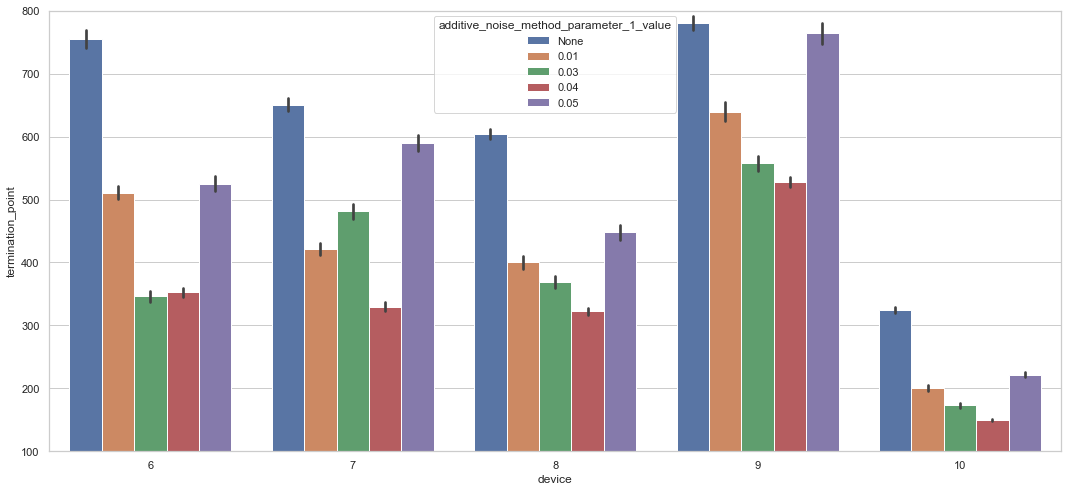

In [5]:
query = """
select
    device, 
    epoch, 
    additive_noise_method,
    additive_noise_method_parameter_1, 
    additive_noise_method_parameter_1_value, 
    additive_noise_method_parameter_2, 
    additive_noise_method_parameter_2_value, 
    termination_point
from
    full_rank_test
where
    test_dataset = 'Wang_2021'
    AND epoch = 65 
    AND distance = 15
    AND denoising_method IS NULL
    AND (additive_noise_method IS NULL OR additive_noise_method = 'Gaussian')
order by 
    additive_noise_method_parameter_1_value
    ;
"""
full_rank_test = pd.read_sql_query(query, con)
full_rank_test.fillna("None",inplace=True)
custom_lines = [Line2D([0], [0], color='b', lw=4),
                Line2D([0], [0], color='orange', lw=4),
                Line2D([0], [0], color='g', lw=4),
                Line2D([0], [0], color='r', lw=4)]
ylim_bottom = 100
ylim_top = 800
sns.set(rc={"figure.figsize":(15, 7)})
sns.set_style("whitegrid")
sns.barplot(x=full_rank_test["device"], y=full_rank_test["termination_point"], hue=full_rank_test["additive_noise_method_parameter_1_value"])
plt.ylim(ylim_bottom,ylim_top)
plt.tight_layout()
plt.savefig("../docs/figs/Gaussian_comparison_Wang2021.png")
plt.show()

## Collected noise

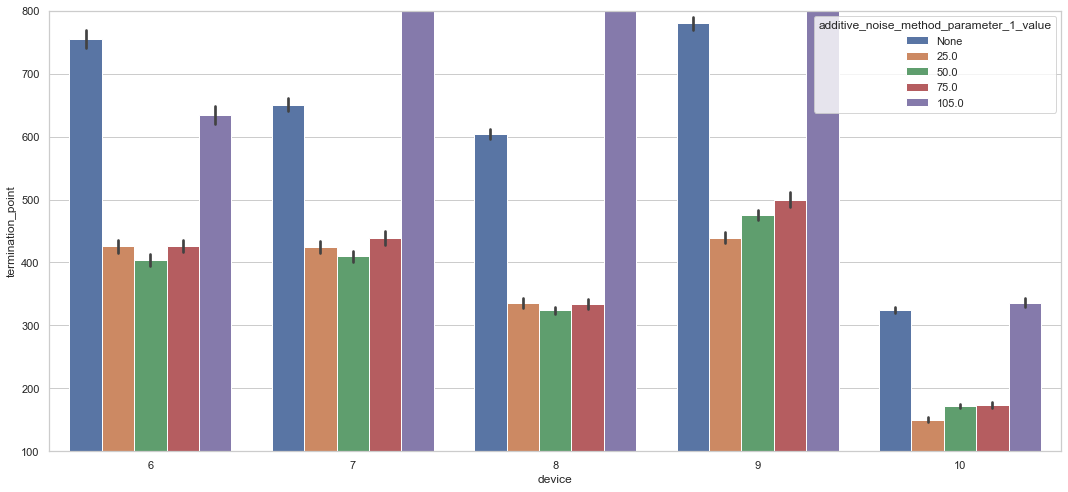

In [6]:
query = """
select
    device, 
    epoch, 
    additive_noise_method,
    additive_noise_method_parameter_1, 
    additive_noise_method_parameter_1_value, 
    additive_noise_method_parameter_2, 
    additive_noise_method_parameter_2_value, 
    termination_point
from
    full_rank_test
where
    test_dataset = 'Wang_2021'
    AND epoch = 65 
    AND distance = 15
    AND denoising_method IS NULL
    AND (additive_noise_method IS NULL OR additive_noise_method = 'Collected')
order by 
    additive_noise_method_parameter_1_value
    ;
"""
full_rank_test = pd.read_sql_query(query, con)
full_rank_test.fillna("None",inplace=True)
custom_lines = [Line2D([0], [0], color='b', lw=4),
                Line2D([0], [0], color='orange', lw=4),
                Line2D([0], [0], color='g', lw=4),
                Line2D([0], [0], color='r', lw=4)]
ylim_bottom = 100
ylim_top = 800
sns.set(rc={"figure.figsize":(15, 7)})
sns.set_style("whitegrid")
sns.barplot(x=full_rank_test["device"], y=full_rank_test["termination_point"], hue=full_rank_test["additive_noise_method_parameter_1_value"])
plt.ylim(ylim_bottom,ylim_top)
plt.tight_layout()
plt.savefig("../docs/figs/Collected_comparison_Wang2021.png")
plt.show()

## Rayleigh Noise

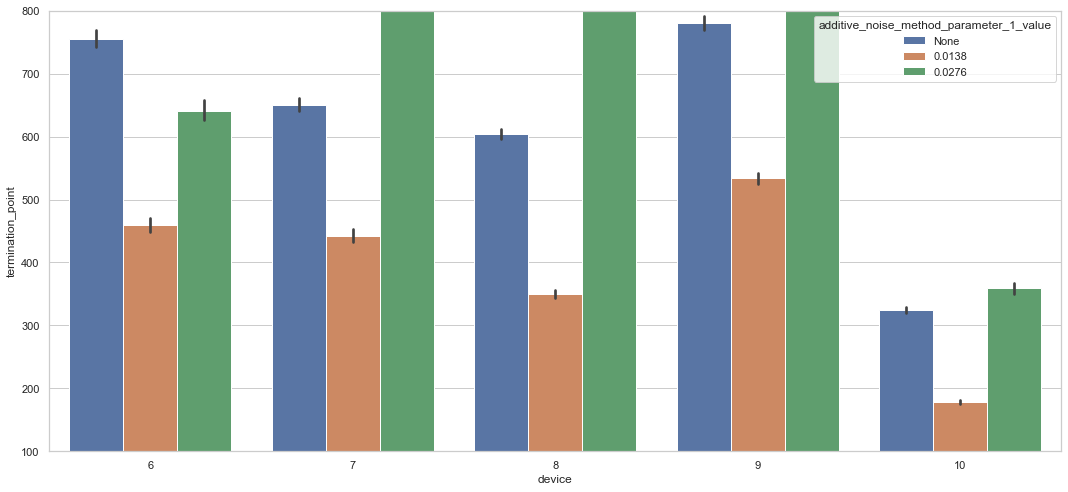

In [7]:
query = """
select
    device, 
    epoch, 
    additive_noise_method,
    additive_noise_method_parameter_1, 
    additive_noise_method_parameter_1_value, 
    additive_noise_method_parameter_2, 
    additive_noise_method_parameter_2_value, 
    termination_point
from
    full_rank_test
where
    test_dataset = 'Wang_2021'
    AND epoch = 65 
    AND distance = 15
    AND denoising_method IS NULL
    AND (additive_noise_method IS NULL OR additive_noise_method = 'Rayleigh')
order by 
    additive_noise_method_parameter_1_value
    ;
"""
full_rank_test = pd.read_sql_query(query, con)
full_rank_test.fillna("None",inplace=True)
custom_lines = [Line2D([0], [0], color='b', lw=4),
                Line2D([0], [0], color='orange', lw=4),
                Line2D([0], [0], color='g', lw=4),
                Line2D([0], [0], color='r', lw=4)]
ylim_bottom = 100
ylim_top = 800
sns.set(rc={"figure.figsize":(15, 7)})
sns.set_style("whitegrid")
sns.barplot(x=full_rank_test["device"], y=full_rank_test["termination_point"], hue=full_rank_test["additive_noise_method_parameter_1_value"])
plt.ylim(ylim_bottom,ylim_top)
plt.tight_layout()
plt.savefig("../docs/figs/Rayleigh_comparison_Wang2021.png")
plt.show()

## Denoising - Moving Average filter

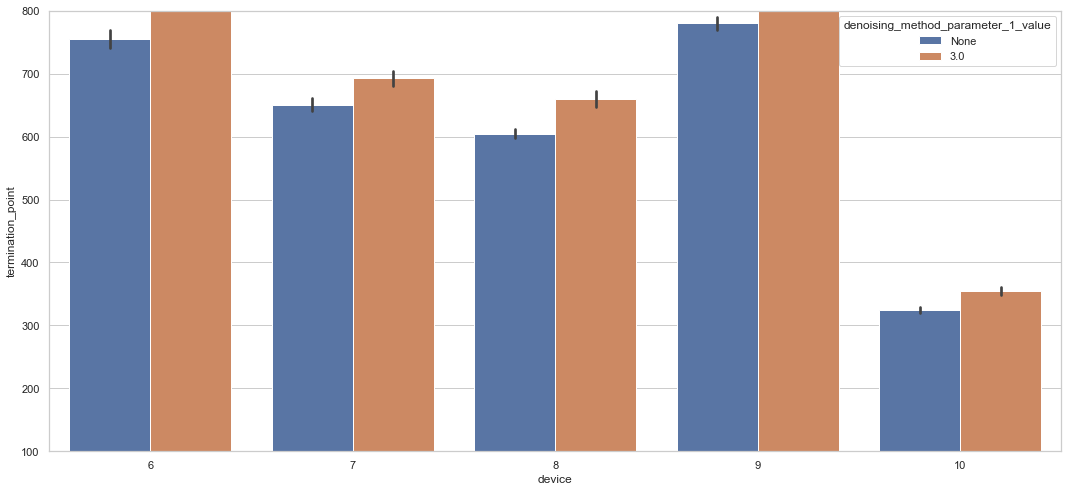

In [8]:
query = """
select
    device, 
    epoch, 
    denoising_method,
    denoising_method_parameter_1, 
    denoising_method_parameter_1_value, 
    denoising_method_parameter_2, 
    denoising_method_parameter_2_value, 
    termination_point
from
    full_rank_test
where
    test_dataset = 'Wang_2021'
    AND epoch = 65 
    AND distance = 15
    AND additive_noise_method IS NULL
    AND (denoising_method IS NULL OR denoising_method = 'Moving Average Filter')
order by 
    denoising_method_parameter_1_value
    ;
"""
full_rank_test = pd.read_sql_query(query, con)
full_rank_test.fillna("None",inplace=True)
custom_lines = [Line2D([0], [0], color='b', lw=4),
                Line2D([0], [0], color='orange', lw=4),
                Line2D([0], [0], color='g', lw=4),
                Line2D([0], [0], color='r', lw=4)]
ylim_bottom = 100
ylim_top = 800
sns.set(rc={"figure.figsize":(15, 7)})
sns.set_style("whitegrid")
sns.barplot(x=full_rank_test["device"], y=full_rank_test["termination_point"], hue=full_rank_test["denoising_method_parameter_1_value"])
plt.ylim(ylim_bottom,ylim_top)
plt.tight_layout()
plt.savefig("../docs/figs/Denoising_comparison_Wang2021.png")
plt.show()

## Epoch analysis

### Epoch - Collected 50

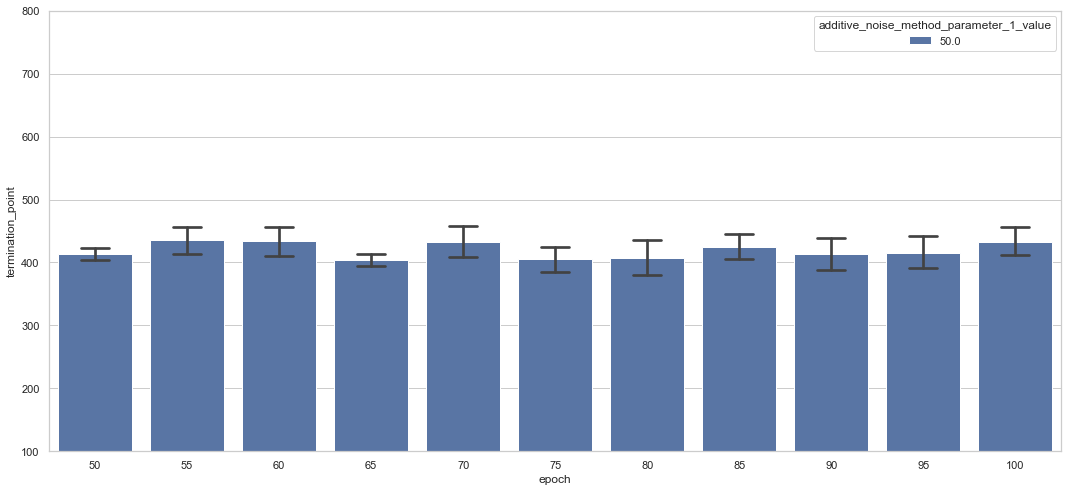

In [9]:
query = """
select
    device, 
    epoch, 
    additive_noise_method,
    additive_noise_method_parameter_1, 
    additive_noise_method_parameter_1_value, 
    additive_noise_method_parameter_2, 
    additive_noise_method_parameter_2_value, 
    termination_point
from
    full_rank_test
where
    test_dataset = 'Wang_2021'
    AND device = 6
    AND distance = 15
    AND denoising_method IS NULL
    AND additive_noise_method_parameter_1_value = 50 
    AND additive_noise_method = 'Collected'
order by 
    epoch
    ;
"""
full_rank_test = pd.read_sql_query(query, con)
full_rank_test.fillna("None",inplace=True)
custom_lines = [Line2D([0], [0], color='b', lw=4),
                Line2D([0], [0], color='orange', lw=4),
                Line2D([0], [0], color='g', lw=4),
                Line2D([0], [0], color='r', lw=4)]
ylim_bottom = 100
ylim_top = 800
sns.set(rc={"figure.figsize":(15, 7)})
sns.set_style("whitegrid")
sns.barplot(x=full_rank_test["epoch"], y=full_rank_test["termination_point"], hue=full_rank_test["additive_noise_method_parameter_1_value"], capsize=0.3,)
plt.ylim(ylim_bottom,ylim_top)
plt.tight_layout()
plt.savefig("../docs/figs/Epoch_Collected_25_comparison_Wang2021.png")
plt.show()

### Epoch - Rayleigh 0.0138

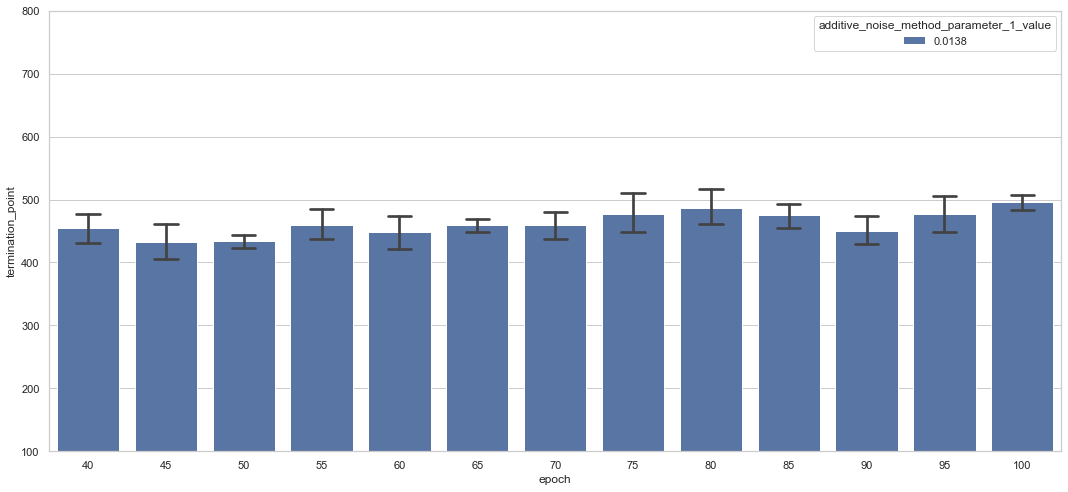

In [10]:
query = """
select
    device, 
    epoch, 
    additive_noise_method,
    additive_noise_method_parameter_1, 
    additive_noise_method_parameter_1_value, 
    additive_noise_method_parameter_2, 
    additive_noise_method_parameter_2_value, 
    termination_point
from
    full_rank_test
where
    test_dataset = 'Wang_2021'
    AND device = 6
    AND distance = 15
    AND denoising_method IS NULL
    AND additive_noise_method_parameter_1_value = 0.0138
    AND additive_noise_method = 'Rayleigh'
order by 
    epoch
    ;
"""
full_rank_test = pd.read_sql_query(query, con)
full_rank_test.fillna("None",inplace=True)
custom_lines = [Line2D([0], [0], color='b', lw=4),
                Line2D([0], [0], color='orange', lw=4),
                Line2D([0], [0], color='g', lw=4),
                Line2D([0], [0], color='r', lw=4)]
ylim_bottom = 100
ylim_top = 800
sns.set(rc={"figure.figsize":(15, 7)})
sns.set_style("whitegrid")
sns.barplot(x=full_rank_test["epoch"], y=full_rank_test["termination_point"], hue=full_rank_test["additive_noise_method_parameter_1_value"], capsize=0.3,)
plt.ylim(ylim_bottom,ylim_top)
plt.tight_layout()
plt.savefig("../docs/figs/Epoch_Rayleigh_0138_comparison_Wang2021.png")
plt.show()

### Epoch - Gaussian 0.04

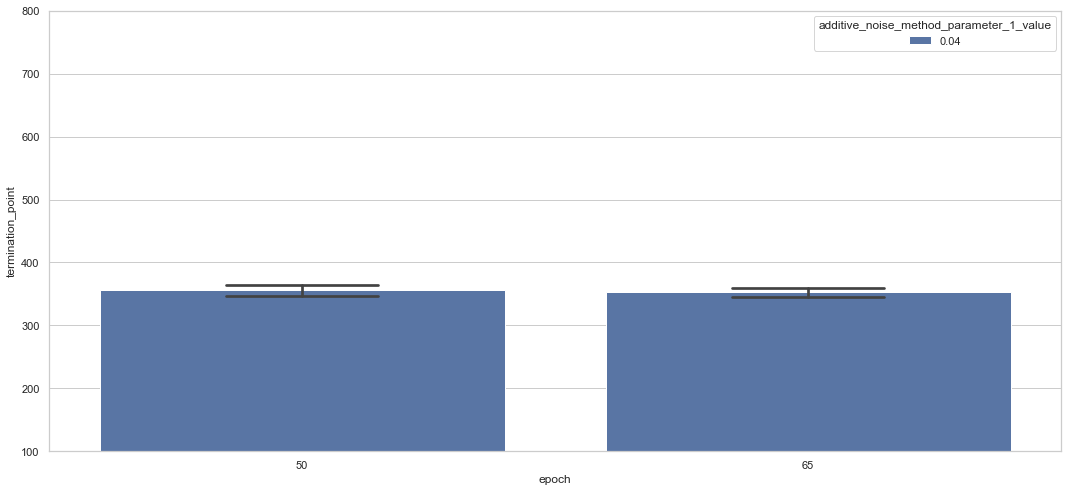

In [11]:
# Epoch analysis was done on "hidden layer" gaussian.
query = """
select
    device, 
    epoch, 
    additive_noise_method,
    additive_noise_method_parameter_1, 
    additive_noise_method_parameter_1_value, 
    additive_noise_method_parameter_2, 
    additive_noise_method_parameter_2_value, 
    termination_point
from
    full_rank_test
where
    test_dataset = 'Wang_2021'
    AND device = 6
    AND distance = 15
    AND denoising_method IS NULL
    AND additive_noise_method_parameter_1_value = 0.04
    AND additive_noise_method = 'Gaussian'
order by 
    epoch
    ;
"""
full_rank_test = pd.read_sql_query(query, con)
full_rank_test.fillna("None",inplace=True)
custom_lines = [Line2D([0], [0], color='b', lw=4),
                Line2D([0], [0], color='orange', lw=4),
                Line2D([0], [0], color='g', lw=4),
                Line2D([0], [0], color='r', lw=4)]
ylim_bottom = 100
ylim_top = 800
sns.set(rc={"figure.figsize":(15, 7)})
sns.set_style("whitegrid")
sns.barplot(x=full_rank_test["epoch"], y=full_rank_test["termination_point"], hue=full_rank_test["additive_noise_method_parameter_1_value"], capsize=0.3,)
plt.ylim(ylim_bottom,ylim_top)
plt.tight_layout()
plt.savefig("../docs/figs/Epoch_Gaussian_04_comparison_Wang2021.png")
plt.show()

# Test dataset - Zedigh 2021

## Additive noise comparison

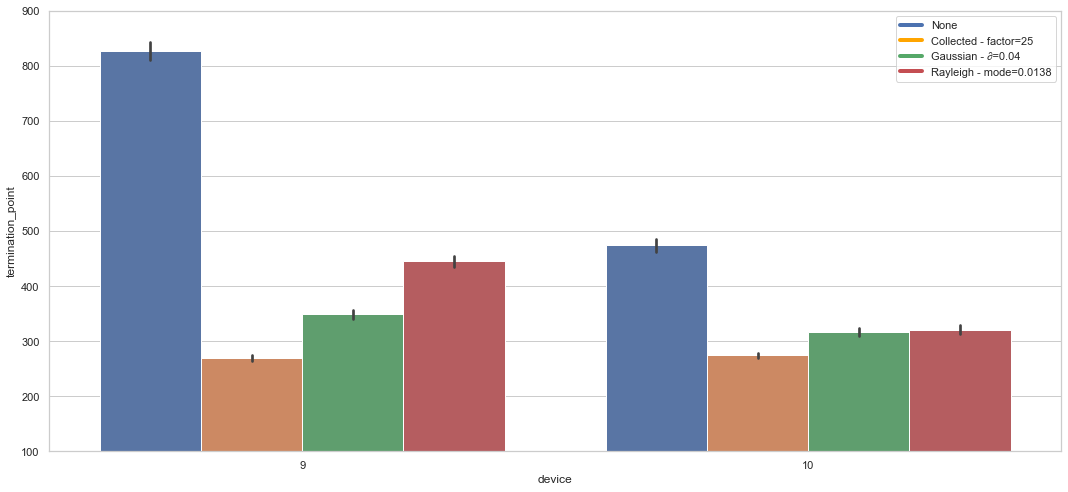

In [27]:
query = """
select
    device, 
    epoch, 
    additive_noise_method,
    additive_noise_method_parameter_1, 
    additive_noise_method_parameter_1_value, 
    additive_noise_method_parameter_2, 
    additive_noise_method_parameter_2_value, 
    termination_point
from
    full_rank_test
where
    test_dataset = 'Zedigh_2021'
    AND epoch = 65 
    AND distance = 2
    AND denoising_method IS NULL
    AND (
        additive_noise_method_parameter_1_value = 0.04
        OR additive_noise_method_parameter_1_value IS NULL
        OR additive_noise_method_parameter_1_value = 25
        OR additive_noise_method_parameter_1_value = 0.0138
    )
order by
    additive_noise_method
    ;
"""
full_rank_test = pd.read_sql_query(query, con)
full_rank_test
full_rank_test.fillna("None",inplace=True)
custom_lines = [Line2D([0], [0], color='b', lw=4),
                Line2D([0], [0], color='orange', lw=4),
                Line2D([0], [0], color='g', lw=4),
                Line2D([0], [0], color='r', lw=4)]
ylim_bottom = 100
ylim_top = 900
labels = ["None", "Collected - factor=25", "Gaussian - ∂=0.04", "Rayleigh - mode=0.0138"]
sns.set(rc={"figure.figsize":(15, 7)})
sns.set_style("whitegrid")
sns.barplot(x=full_rank_test["device"], y=full_rank_test["termination_point"], hue=full_rank_test["additive_noise_method"])
plt.ylim(ylim_bottom,ylim_top)
plt.tight_layout()
plt.legend(custom_lines, labels)
plt.savefig("../docs/figs/Additive_noise_comparison_Zedigh2021.png")
plt.show()

## Gaussians - epoch 65, distance 2.5m

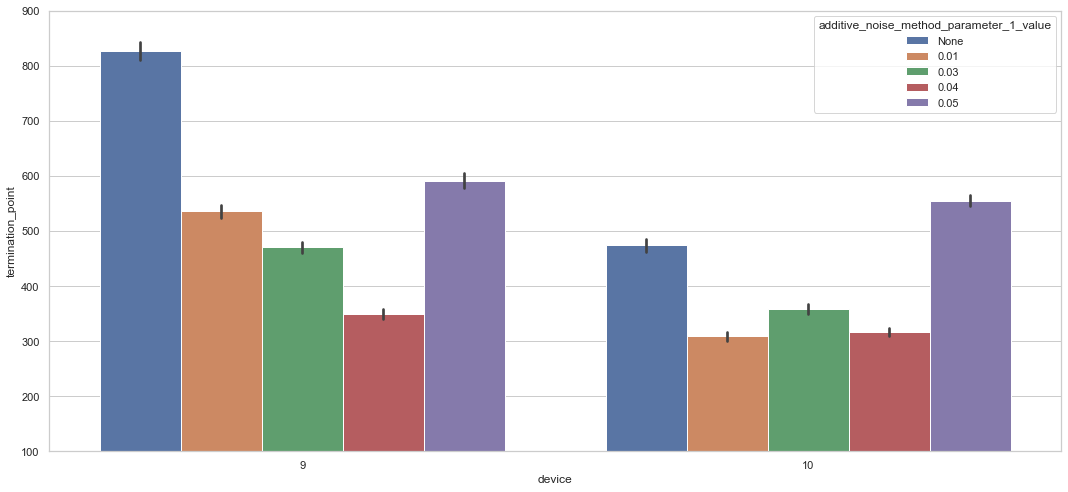

In [23]:
query = """
select
    device, 
    epoch, 
    additive_noise_method,
    additive_noise_method_parameter_1, 
    additive_noise_method_parameter_1_value, 
    additive_noise_method_parameter_2, 
    additive_noise_method_parameter_2_value, 
    termination_point
from
    full_rank_test
where
    test_dataset = 'Zedigh_2021'
    AND epoch = 65 
    AND distance = 2
    AND denoising_method IS NULL
    AND (additive_noise_method IS NULL OR additive_noise_method = 'Gaussian')
order by 
    additive_noise_method_parameter_1_value
    ;
"""
full_rank_test = pd.read_sql_query(query, con)
full_rank_test.fillna("None",inplace=True)
custom_lines = [Line2D([0], [0], color='b', lw=4),
                Line2D([0], [0], color='orange', lw=4),
                Line2D([0], [0], color='g', lw=4),
                Line2D([0], [0], color='r', lw=4)]
ylim_bottom = 100
ylim_top = 900
sns.set(rc={"figure.figsize":(15, 7)})
sns.set_style("whitegrid")
sns.barplot(x=full_rank_test["device"], y=full_rank_test["termination_point"], hue=full_rank_test["additive_noise_method_parameter_1_value"])
plt.ylim(ylim_bottom,ylim_top)
plt.tight_layout()
plt.savefig("../docs/figs/Gaussian_comparison_Zedigh2021.png")
plt.show()

## Collected noise 2.5m

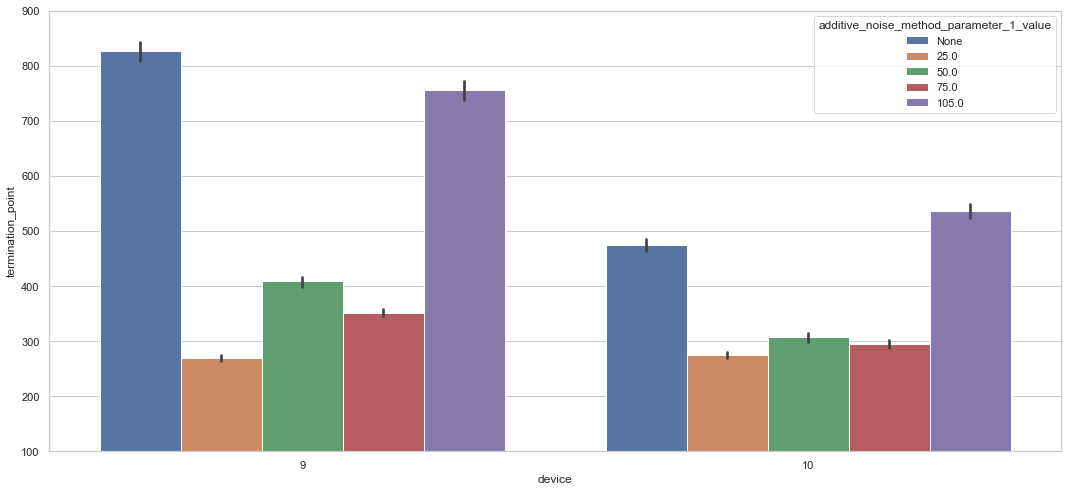

In [24]:
query = """
select
    device, 
    epoch, 
    additive_noise_method,
    additive_noise_method_parameter_1, 
    additive_noise_method_parameter_1_value, 
    additive_noise_method_parameter_2, 
    additive_noise_method_parameter_2_value, 
    termination_point
from
    full_rank_test
where
    test_dataset = 'Zedigh_2021'
    AND epoch = 65 
    AND distance = 2
    AND denoising_method IS NULL
    AND (additive_noise_method IS NULL OR additive_noise_method = 'Collected')
order by 
    additive_noise_method_parameter_1_value
    ;
"""
full_rank_test = pd.read_sql_query(query, con)
full_rank_test.fillna("None",inplace=True)
custom_lines = [Line2D([0], [0], color='b', lw=4),
                Line2D([0], [0], color='orange', lw=4),
                Line2D([0], [0], color='g', lw=4),
                Line2D([0], [0], color='r', lw=4)]
ylim_bottom = 100
ylim_top = 900
sns.set(rc={"figure.figsize":(15, 7)})
sns.set_style("whitegrid")
sns.barplot(x=full_rank_test["device"], y=full_rank_test["termination_point"], hue=full_rank_test["additive_noise_method_parameter_1_value"])
plt.ylim(ylim_bottom,ylim_top)
plt.tight_layout()
plt.savefig("../docs/figs/Collected_comparison_Zedigh2021.png")
plt.show()

## Rayleigh Noise 2.5m

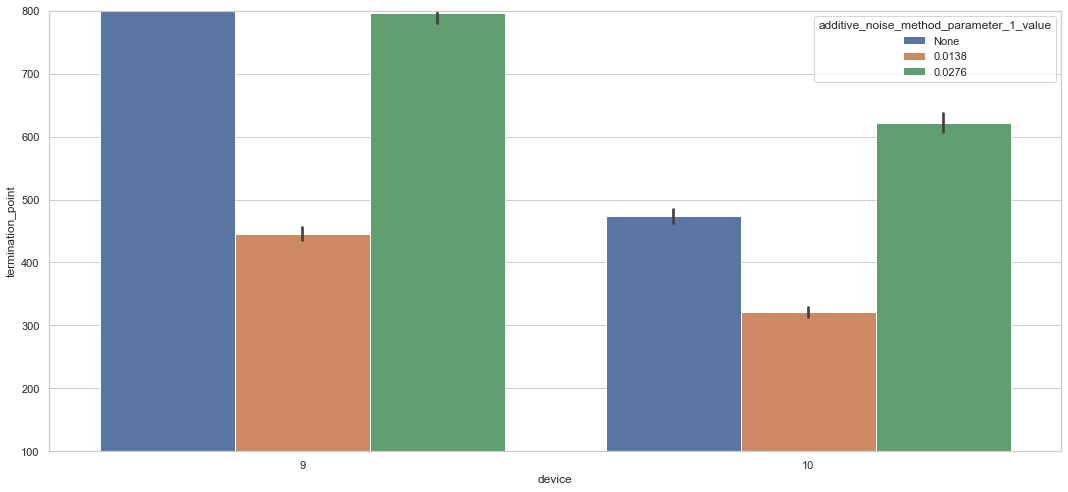

In [15]:
query = """
select
    device, 
    epoch, 
    additive_noise_method,
    additive_noise_method_parameter_1, 
    additive_noise_method_parameter_1_value, 
    additive_noise_method_parameter_2, 
    additive_noise_method_parameter_2_value, 
    termination_point
from
    full_rank_test
where
    test_dataset = 'Zedigh_2021'
    AND epoch = 65 
    AND distance = 2
    AND denoising_method IS NULL
    AND (additive_noise_method IS NULL OR additive_noise_method = 'Rayleigh')
order by 
    additive_noise_method_parameter_1_value
    ;
"""
full_rank_test = pd.read_sql_query(query, con)
full_rank_test.fillna("None",inplace=True)
custom_lines = [Line2D([0], [0], color='b', lw=4),
                Line2D([0], [0], color='orange', lw=4),
                Line2D([0], [0], color='g', lw=4),
                Line2D([0], [0], color='r', lw=4)]
ylim_bottom = 100
ylim_top = 800
sns.set(rc={"figure.figsize":(15, 7)})
sns.set_style("whitegrid")
sns.barplot(x=full_rank_test["device"], y=full_rank_test["termination_point"], hue=full_rank_test["additive_noise_method_parameter_1_value"])
plt.ylim(ylim_bottom,ylim_top)
plt.tight_layout()
plt.savefig("../docs/figs/Rayleigh_comparison_Zedigh2021.png")
plt.show()

## Denoising - Moving Average filter 

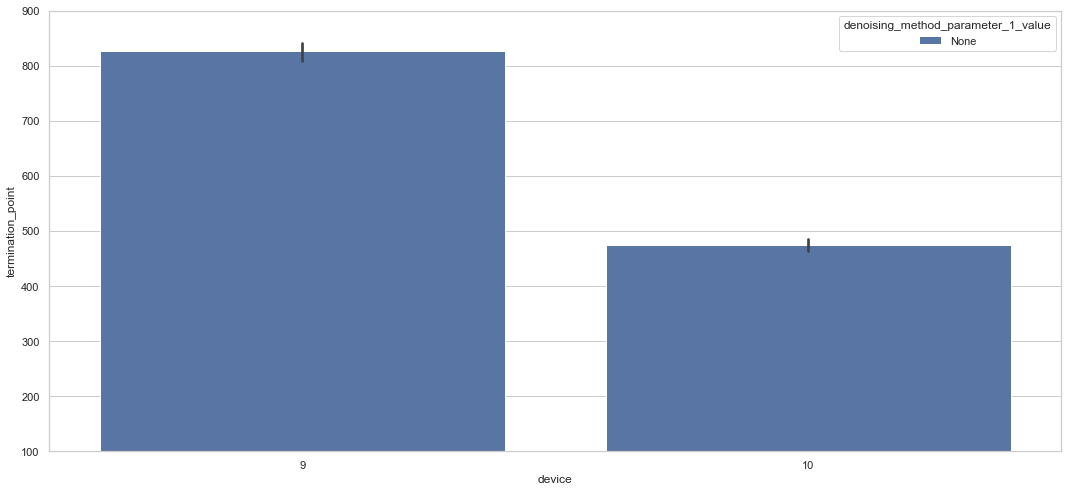

In [25]:
query = """
select
    device, 
    epoch, 
    denoising_method,
    denoising_method_parameter_1, 
    denoising_method_parameter_1_value, 
    denoising_method_parameter_2, 
    denoising_method_parameter_2_value, 
    termination_point
from
    full_rank_test
where
    test_dataset = 'Zedigh_2021'
    AND epoch = 65 
    AND distance = 2
    AND additive_noise_method IS NULL
    AND (denoising_method IS NULL OR denoising_method = 'Moving Average Filter')
order by 
    denoising_method_parameter_1_value
    ;
"""
full_rank_test = pd.read_sql_query(query, con)
full_rank_test.fillna("None",inplace=True)
custom_lines = [Line2D([0], [0], color='b', lw=4),
                Line2D([0], [0], color='orange', lw=4),
                Line2D([0], [0], color='g', lw=4),
                Line2D([0], [0], color='r', lw=4)]
ylim_bottom = 100
ylim_top = 900
sns.set(rc={"figure.figsize":(15, 7)})
sns.set_style("whitegrid")
sns.barplot(x=full_rank_test["device"], y=full_rank_test["termination_point"], hue=full_rank_test["denoising_method_parameter_1_value"])
plt.ylim(ylim_bottom,ylim_top)
plt.tight_layout()
plt.savefig("../docs/figs/Denoising_comparison_Zedigh2021.png")
plt.show()

# Totaling

## Comparision between methods, distance and device non-specific

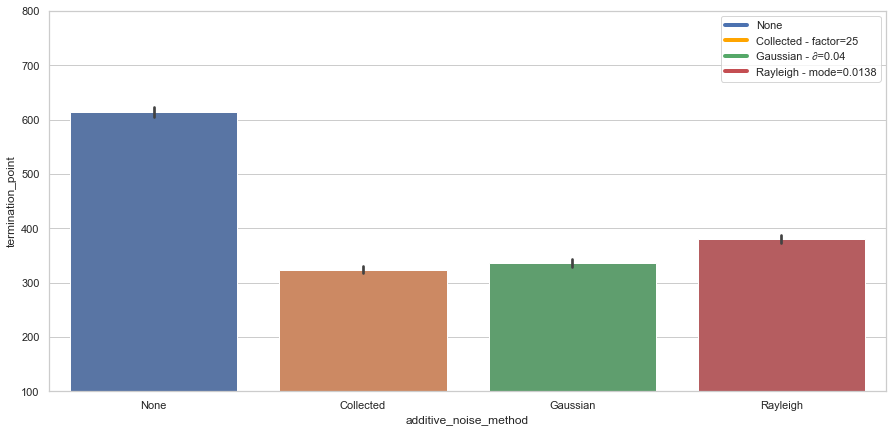

In [17]:
query = """
select
    device, 
    epoch, 
    additive_noise_method,
    additive_noise_method_parameter_1, 
    additive_noise_method_parameter_1_value, 
    additive_noise_method_parameter_2, 
    additive_noise_method_parameter_2_value, 
    termination_point
from
    full_rank_test
where
    epoch = 65 
    AND denoising_method IS NULL
    AND (
        additive_noise_method_parameter_1_value = 0.04
        OR additive_noise_method_parameter_1_value IS NULL
        OR additive_noise_method_parameter_1_value = 25
        OR additive_noise_method_parameter_1_value = 0.0138
    )
order by
    additive_noise_method
    ;
"""
full_rank_test = pd.read_sql_query(query, con)
full_rank_test.fillna("None",inplace=True)
custom_lines = [Line2D([0], [0], color='b', lw=4),
                Line2D([0], [0], color='orange', lw=4),
                Line2D([0], [0], color='g', lw=4),
                Line2D([0], [0], color='r', lw=4)]
ylim_bottom = 100
ylim_top = 800
#labels = ["None", "Collected - factor=25", "Gaussian - ∂=0.04", "Rayleigh - mode=0.0138"]
sns.set(rc={"figure.figsize":(15, 7)})
sns.set_style("whitegrid")
sns.barplot(x=full_rank_test["additive_noise_method"], y=full_rank_test["termination_point"])
plt.ylim(ylim_bottom,ylim_top)
#plt.tight_layout()
plt.legend(custom_lines, labels)
plt.savefig("../docs/figs/Additive_noise_comparison_ALL.png")
plt.show()

In [18]:
con.close()